<a href="https://colab.research.google.com/github/PhaTanVu/AI_W9_31-03/blob/main/Week9(cifar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#Cifar10 
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape
x_test.shape

(10000, 32, 32, 3)

In [18]:
x_train.shape

(50000, 32, 32, 3)

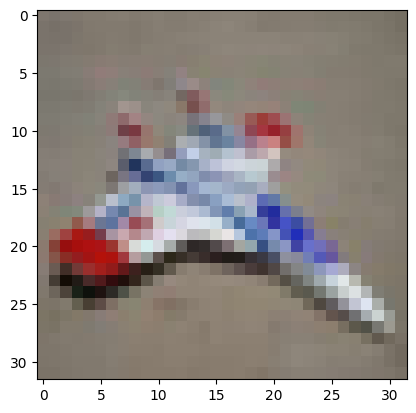

Nay la: [3]


In [23]:
# display an image from the dataset
import matplotlib.pyplot as plt
hinh = x_train[30]
plt.imshow(hinh, cmap=plt.cm.binary)
plt.show()
print('Nay la:', y_train[21])

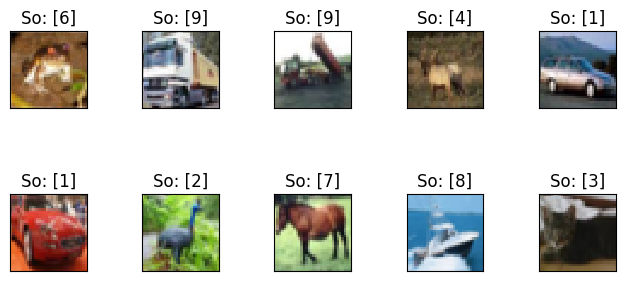

In [26]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation='none')
  plt.title('So: {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

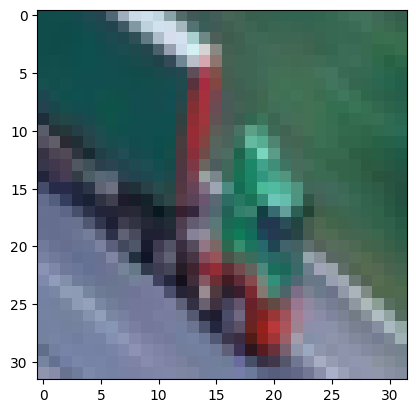

This image is: [9]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 9s 21ms/step - loss: 2.2582 - accuracy: 0.2574
Epoch 2/10
391/391 [==============================] - 8s 20ms/step - loss: 1.8013 - accuracy: 0.3573
Epoch 3/10
391/391 [==============================] - 8s 21ms/step - loss: 1.7043 - accuracy: 0.3949
Epoch 4/10
391/391 [==============================] - 8s 20ms/step - loss: 1.6489 - accuracy: 0.4151
Epoch 5/10
391/391 

In [27]:
from keras.datasets import cifar10
from keras.utils import to_categorical

# load the cifar10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# display an image from the dataset
plt.imshow(train_images[50])
plt.show()
print('This image is:', train_labels[50])

# preprocess the data
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# add a virtual layer to the input shape
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_shape=(32*32*3,), activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

# compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test accuracy:', test_acc)
print('test loss:', test_loss)

In [28]:
# add a virtual layer to the input shape
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(256, input_shape=(32*32*3,), activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

# compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test accuracy:', test_acc)
print('test loss:', test_loss)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               786688    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 2.1526 - accuracy: 0.2627
Epoch 2/10
391/391 [==============================] - 5s 12ms/step - loss: 1.8200 - accuracy: 0.3470
Epoch 3/10
391/391 [==============================] - 5s 12ms/step - loss: 1.7436 - accuracy: 0.3776
Epoch 4/10
391/391 [==============================] - 5s 12ms/step - loss: 1.6989 - accuracy: 0.3964
Epoch 5/10
391/391 [====================

In [29]:
model.save('test1.h5')

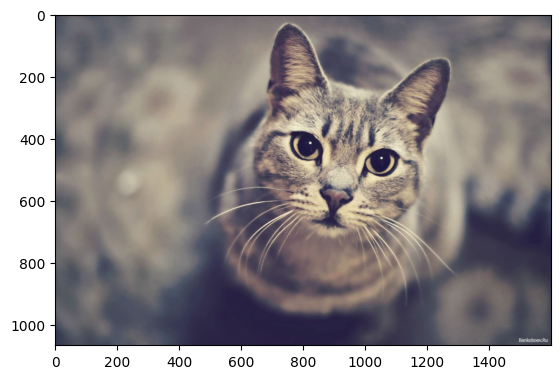

In [30]:
img = plt.imread('/content/R.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 43ms/step


array([8])

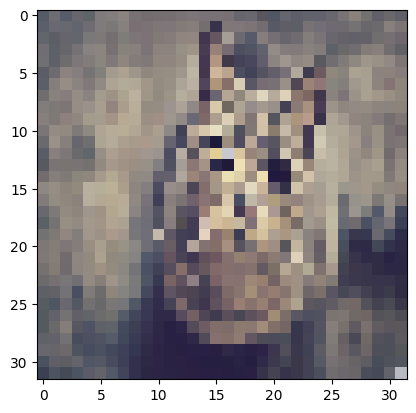

In [34]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
import numpy as np
img = load_img('/content/R.jpg',target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)